In [3]:
!pip install PyPDF2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 604.9 kB/s eta 0:00:00a 0:00:01


In [1]:
import PyPDF2
import os
from tqdm import tqdm

def count_pdf_pages(pdf_file_path):
    try:
        with open(pdf_file_path, 'rb') as file:
            pdf_reader = PyPDF2.PdfReader(file)
            num_pages = len(pdf_reader.pages)
            return num_pages
    except FileNotFoundError:
        print(f"File not found: {pdf_file_path}")
        return None
    except:
        print(f"Error reading PDF file: {pdf_file_path}")
        return None


## Smaller Dataset of 1k papers for experiment

In [5]:
import os
import json
from tqdm import tqdm
import json

data = {}  # Dictionary to store statistics
fail_count = 0
ls_fail = []
for year in tqdm(sorted(os.listdir('/mnt/HDFS/patidarritesh/husain/data'))):
    year_path = os.path.join('/mnt/HDFS/patidarritesh/husain/data', year)
    data[year] = {}  # Create a sub-dictionary for the year

    for month in sorted(os.listdir(year_path)):
        month_path = os.path.join(year_path, month)
        data[year][month] = {}  # Create a sub-dictionary for the month
        data[year][month]['lst_num_pages'] = []  # Initialize the total count for the month
        
        for path in sorted(os.listdir(month_path)):
            pdf_file_path = os.path.join(month_path, path)

            num_pages = count_pdf_pages(pdf_file_path)
            if num_pages is not None:
                # Store the number of pages in the dictionary
                data[year][month]['lst_num_pages'].append(num_pages)
            else:
                print(f'Error could not read PDF file {pdf_file_path}.')
                fail_count += 1
                ls_fail.append(pdf_file_path)

        # Store the total count for the month
        data[year][month]['total_pages'] = sum(data[year][month]['lst_num_pages'])
        data[year][month]['total_pdf'] = len(data[year][month]['lst_num_pages'])
# Save the data to a JSON file
output_file_path = '/mnt/HDFS/patidarritesh/husain/pdf_statistics.json'
with open(output_file_path, 'w') as json_file:
    json.dump(data, json_file, indent=2)

print(f"Statistics saved to {output_file_path}")

print(f"Failed to read {fail_count} PDF files.")


 38%|███▊      | 9/24 [00:01<00:02,  5.34it/s]

Error reading PDF file: /mnt/HDFS/patidarritesh/husain/data/2008/0804/0804.2473.pdf
Error could not read PDF file /mnt/HDFS/patidarritesh/husain/data/2008/0804/0804.2473.pdf.


100%|██████████| 24/24 [00:04<00:00,  5.08it/s]

Statistics saved to /mnt/HDFS/patidarritesh/husain/pdf_statistics.json
Failed to read 1 PDF files.


## Entire Dataset 2.2M papers

In [2]:
import statistics
from tabulate import tabulate
import json

# Calculate the mean, median, and mode
all_pages = []
year_stats = {
    'mean': [],
    'median': [],
    'mode': []  # Added 'mode' to the dictionary
}

output_file_path = '/mnt/HDFS/patidarritesh/husain/final_statistics.json'

# Read the JSON file into a Python dictionary
with open(output_file_path, 'r') as json_file:
    data = json.load(json_file)

for year in data:
    year_pages = []  # Use a different name for the list
    for month in data[year]:
        all_pages.extend(data[year][month]['lst_num_pages'])
        year_pages.extend(data[year][month]['lst_num_pages'])
    
    mean_year_pages = statistics.mean(year_pages)
    median_year_pages = statistics.median(year_pages)
    mode_year_pages = statistics.mode(year_pages)

    print(f"{year}: ", max(year_pages),     year_pages.index(max(year_pages))
)
    
    year_stats['mean'].append(mean_year_pages)
    year_stats['median'].append(median_year_pages)
    year_stats['mode'].append(mode_year_pages)

mean_pages = statistics.mean(all_pages)
median_pages = statistics.median(all_pages)
mode_pages = statistics.mode(all_pages)

print(f"Mean number of pages: {mean_pages}")
print(f"Median number of pages: {median_pages}")
print(f"Mode number of pages: {mode_pages}")
print(f"Mean number of pages per year: {year_stats['mean']}")
print(f"Median number of pages per year: {year_stats['median']}")
print(f"Mode number of pages per year: {year_stats['mode']}")
print(f"Total number of PDF files: {len(all_pages)}")




# Prepare data for the table
table_data = [
    ["Mean", f"{mean_pages:.2f}"],
    ["Median", median_pages],
    ["Mode", mode_pages],
    ["Tot_PDF", len(all_pages)],
    ["Min", min(all_pages)],
    ["Max", max(all_pages)]
]

table_data2 = []
min_yearwise = float('inf')
max_yearwise = float('-inf')

for i, (mean, median, mode, year) in enumerate(zip(year_stats['mean'], year_stats['median'], year_stats['mode'], data.keys())):
    if 'total_pdf' in data[year]:
        year_data = data[year]['total_pdf']
        year_min = min(year_data, default=0)
        year_max = max(year_data, default=0)

        # Update global min and max
        min_yearwise = min(min_yearwise, year_min)
        max_yearwise = max(max_yearwise, year_max)

        table_data2.append([f"{year}", f"{mean:.2f}", median, mode, year_min, year_max])
    else:
        # Handle the case where 'total_pdf' is not present in data[year]
        table_data2.append([f"{year}", f"{mean:.2f}", median, mode, "N/A", "N/A"])

# Print the table
table = tabulate(table_data, headers=["Statistic", "Value"], tablefmt="pretty")

print(table)

print('\n \n \n \n \n')


table2 = tabulate(table_data2, headers=["Year", "Mean", "Median","Mode", "Min", "Max"], tablefmt="pretty")

print(table2)



2000:  271 7672
2001:  595 7025
2002:  583 1408
2003:  462 23529
2004:  1653 30732
2005:  876 13800
2006:  4593 18915
2007:  701 31748
2008:  814 39565
2009:  1852 510
2010:  1106 51378
2011:  1235 63423
2012:  926 38125
2013:  1673 75572
2014:  2349 33818
2015:  1851 94527
2016:  3762 81834
2017:  907 108665
2018:  2457 78210
2019:  1377 21668
2020:  1885 167724
2021:  1226 14201
2022:  3134 55111
2023:  1664 110036
Mean number of pages: 18.833867321794884
Median number of pages: 14
Mode number of pages: 10
Mean number of pages per year: [16.500965410713302, 16.17007318520472, 16.081686612858334, 16.141152168923572, 16.638926544585622, 16.740104009971205, 17.180734955442073, 16.871385950637375, 17.395671040043734, 17.75993518139769, 17.874273852939904, 18.17269584949471, 18.30739095122068, 18.526563946207872, 19.00410030778129, 19.178375999693873, 19.345465356727637, 19.183525047589608, 19.093923441216596, 19.10212091332676, 19.904200686975617, 20.24792958945611, 20.239104466317492, 1

In [3]:
import os

def process_year(year_path):

    for month in sorted(os.listdir(year_path)):
        if(month != 'json_files'):
            month_path = os.path.join(year_path, month)
            month_pages = {}

            for path in sorted(os.listdir(month_path)):
                pdf_file_path = os.path.join(month_path, path)
                num_pages = count_pdf_pages(pdf_file_path)

                if num_pages is not None:
                    # Store the number of pages in the dictionary
                    month_pages[path] = num_pages

            if month_pages:
                max_pdf_path = max(month_pages, key=month_pages.get)
                max_num_pages = month_pages[max_pdf_path]

                print(f"{month}: Maximum pages - {max_num_pages}, PDF path - {max_pdf_path}")


process_year('/mnt/HDFS/patidarritesh/pdf_extr/2006')


Error reading PDF file: /mnt/HDFS/patidarritesh/pdf_extr/2006/0601/astro-ph0601081.pdf


In [2]:
import os

def process_year(year_path):

    for month in sorted(os.listdir(year_path)):
        if(month != 'json_files'):
            month_path = os.path.join(year_path, month)
            month_pages = {}

            for path in sorted(os.listdir(month_path)):
                pdf_file_path = os.path.join(month_path, path)
                num_pages = count_pdf_pages(pdf_file_path)

                if num_pages is not None:
                    # Store the number of pages in the dictionary
                    month_pages[path] = num_pages

            if month_pages:
                max_pdf_path = max(month_pages, key=month_pages.get)
                max_num_pages = month_pages[max_pdf_path]

                print(f"{month}: Maximum pages - {max_num_pages}, PDF path - {max_pdf_path}")


process_year('/mnt/HDFS/patidarritesh/pdf_extr/2022')


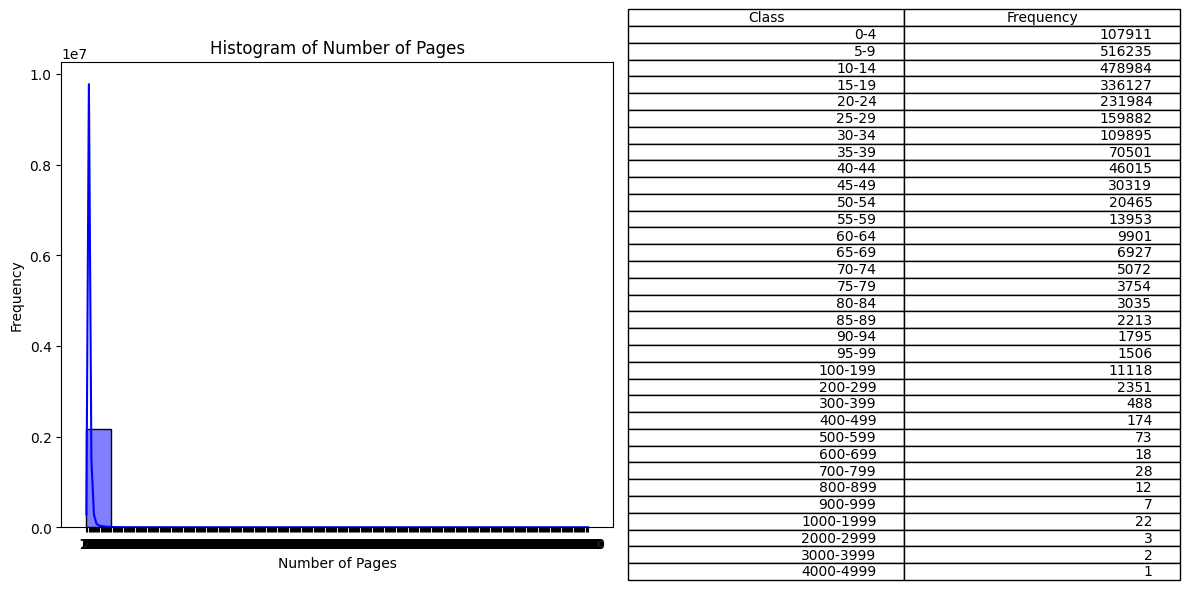

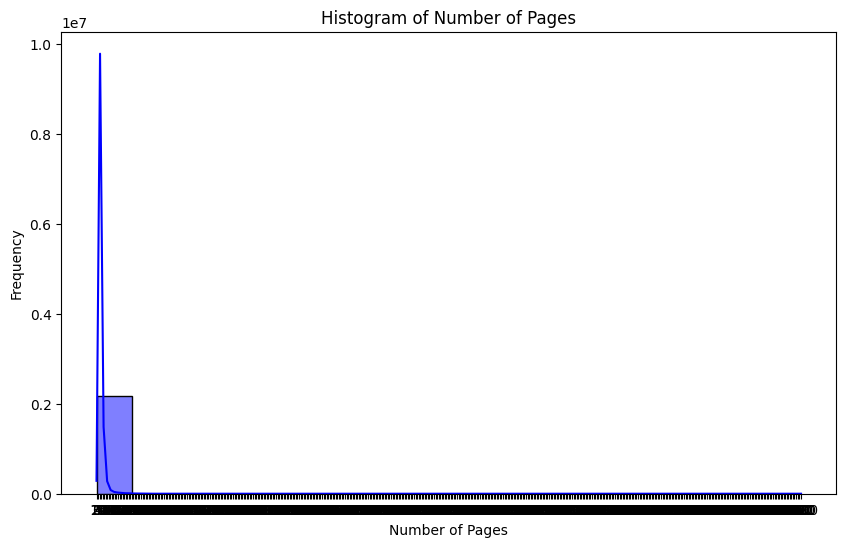

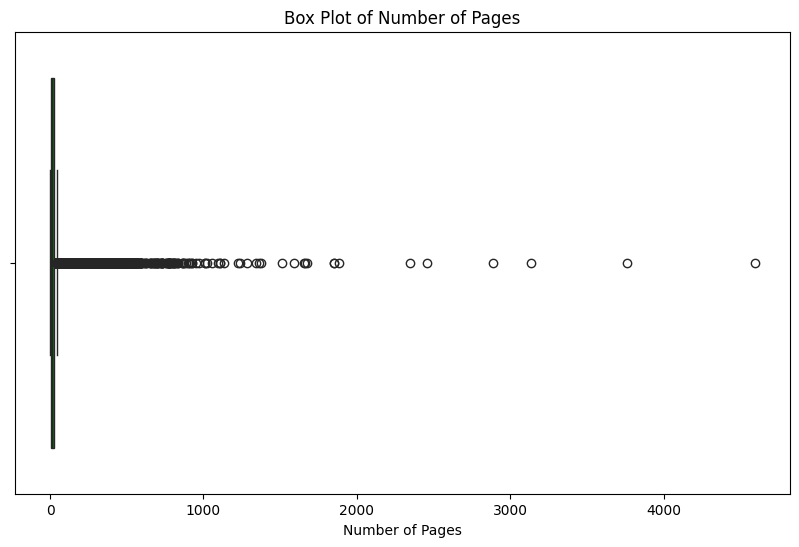

In [4]:
import statistics
import matplotlib.pyplot as plt
import seaborn as sns



# Create a histogram with table
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)  # Create a subplot for the histogram
# Draw the histogram
sns.histplot(all_pages, bins=20, kde=True, color='blue', ax=ax1)
plt.title('Histogram of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')

# Set x-axis ticks to multiples of 5
plt.xticks(range(0, max(all_pages) + 5, 10))

# Add a table to the right of the histogram
ax2 = plt.subplot(1, 2, 2)
ax2.axis('off')  # Turn off the axis for the table

# Create a table showing the frequency in each class
table_data = []
for i in range(0, 100, 5):
    count = sum((i <= page < i + 5) for page in all_pages)
    table_data.append([f'{i}-{i+4}', count])
for i in range(100, 1000, 100):
    count = sum((i <= page < i + 100) for page in all_pages)
    table_data.append([f'{i}-{i+99}', count])
for i in range(1000, max(all_pages), 1000):
    count = sum((i <= page < i + 1000) for page in all_pages)
    table_data.append([f'{i}-{i+999}', count])




table_headers = ['Class', 'Frequency']
ax2.table(cellText=table_data, colLabels=table_headers, loc='center')

plt.tight_layout()
plt.show()

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(all_pages, bins=20, kde=True, color='blue')
plt.title('Histogram of Number of Pages')
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
# Set x-axis ticks to multiples of 5
plt.xticks(range(0, max(all_pages) + 5, 10))
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=all_pages, color='green')
plt.title('Box Plot of Number of Pages')
plt.xlabel('Number of Pages')
plt.show()






In [3]:
import statistics

# Your existing code for data retrieval and calculation

# Calculate Range
data_range = max(all_pages) - min(all_pages)

# Calculate Interquartile Range (IQR)
q1 = statistics.quantiles(all_pages, n=4)[0]
q3 = statistics.quantiles(all_pages, n=4)[2]
iqr = q3 - q1

# Calculate Standard Deviation and Variance
std_deviation = statistics.stdev(all_pages)
variance = statistics.variance(all_pages)

coefficient_of_variation = (std_deviation / mean_pages) * 100


# Print the results
print(f"Range: {data_range}")
print(f"Interquartile Range (IQR): {iqr}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")
print(f"Coefficient of Variation (CV): {coefficient_of_variation:.2f}%")



Range: 4593
Interquartile Range (IQR): 14.0
Standard Deviation: 20.23349473514029
Variance: 409.39430919694985
Coefficient of Variation (CV): 107.43%


In [4]:
# import json

# # Replace 'your_json_file.json' with the actual file path
# file_path = '/mnt/HDFS/patidarritesh/husain/pdf_statistics.json'

# # Open the JSON file and load its contents
# with open(file_path, 'r') as file:
#     json_data = json.load(file)

# # Initialize an empty list to store the total number of pages yearwise
# total_pages_per_year = []

# # Iterate through the years in the JSON data
# for year, months_data in json_data.items():
#     # Initialize total pages for the current year
#     total_pages_current_year = 0
    
#     # Iterate through the months in the current year
#     for month, month_data in months_data.items():
#         # Sum up the total pages for the current month and add to the total for the year
#         total_pages_current_year += month_data["total_pages"]
    
#     # Append the total pages for the current year to the list
#     total_pages_per_year.append({"year": year, "total_pages": total_pages_current_year})

# # Print or use the total_pages_per_year list as needed
# print(total_pages_per_year)



import json
from statistics import mean, median
from scipy.stats import mode

# Replace 'your_json_file.json' with the actual file path
file_path = '/mnt/HDFS/patidarritesh/husain/pdf_statistics.json'

# Open the JSON file and load its contents
with open(file_path, 'r') as file:
    json_data = json.load(file)

# Initialize an empty list to store the total number of pages yearwise
total_pages_per_year = []

# Initialize an empty list to store the total pages of all years
all_years_total_pages = []

# Iterate through the years in the JSON data
for year, months_data in json_data.items():
    # Initialize total pages for the current year
    total_pages_current_year = 0
    
    # Iterate through the months in the current year
    for month, month_data in months_data.items():
        # Sum up the total pages for the current month and add to the total for the year
        total_pages_current_year += month_data["total_pages"]
    
    # Append the total pages for the current year to the list
    total_pages_per_year.append({"year": year, "total_pages": total_pages_current_year})
    
    # Add the total pages for the current year to the list of all years
    all_years_total_pages.append(total_pages_current_year)

# Print or use the total_pages_per_year list as needed
print("Total Pages Yearwise:")
print(total_pages_per_year)

# Calculate mean, median, and mode of total pages across all years
mean_total_pages = mean(all_years_total_pages)
median_total_pages = median(all_years_total_pages)
mode_total_pages = mode(all_years_total_pages).mode[0]

# Print or use the mean, median, and mode values
print("\nMean Total Pages: ", mean_total_pages)
print("Median Total Pages: ", median_total_pages)
print("Mode Total Pages: ", mode_total_pages)


Total Pages Yearwise:
[{'year': '2019', 'total_pages': 1019}, {'year': '2011', 'total_pages': 1089}, {'year': '2023', 'total_pages': 914}, {'year': '2009', 'total_pages': 876}, {'year': '2008', 'total_pages': 767}, {'year': '2002', 'total_pages': 1085}, {'year': '2007', 'total_pages': 913}, {'year': '2016', 'total_pages': 1020}, {'year': '2000', 'total_pages': 689}, {'year': '2017', 'total_pages': 1006}, {'year': '2003', 'total_pages': 960}, {'year': '2012', 'total_pages': 942}, {'year': '2010', 'total_pages': 912}, {'year': '2001', 'total_pages': 894}, {'year': '2022', 'total_pages': 1186}, {'year': '2004', 'total_pages': 1099}, {'year': '2014', 'total_pages': 1139}, {'year': '2006', 'total_pages': 1150}, {'year': '2020', 'total_pages': 1270}, {'year': '2005', 'total_pages': 1039}, {'year': '2018', 'total_pages': 1234}, {'year': '2013', 'total_pages': 986}, {'year': '2021', 'total_pages': 1186}, {'year': '2015', 'total_pages': 873}]

Mean Total Pages:  1010.3333333333334
Median Total 

/tmp/ipykernel_74857/4079750054.py:71: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_total_pages = mode(all_years_total_pages).mode[0]


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
# from your_pdf_count_function_module import count_pdf_pages  # Replace with the actual module containing your function

# Assuming you have the count_pdf_pages function defined

# Function to perform detailed statistical analysis
def detailed_statistics(data):
    df = pd.DataFrame(data).transpose()
    summary = df.describe()

    return df, summary

# Function to create descriptive statistics
def create_descriptive_statistics(data):
    all_data = [pages for month_data in data.values() for pages in month_data.values()]

    mean = pd.Series(all_data).mean()
    median = pd.Series(all_data).median()
    mode = pd.Series(all_data).mode().values[0]
    range_val = pd.Series(all_data).max() - pd.Series(all_data).min()
    iqr = pd.Series(all_data).quantile(0.75) - pd.Series(all_data).quantile(0.25)
    std_dev = pd.Series(all_data).std()
    variance = pd.Series(all_data).var()

    print(f"Descriptive Statistics:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Range: {range_val}")
    print(f"IQR: {iqr}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Variance: {variance}")

    # Plotting histogram
    plt.hist(all_data, bins=20, edgecolor='black')
    plt.xlabel('Number of Pages')
    plt.ylabel('Frequency')
    plt.title('Histogram of Number of Pages')
    plt.show()

    # Box plot
    sns.boxplot(x=all_data)
    plt.xlabel('Number of Pages')
    plt.title('Box Plot of Number of Pages')
    plt.show()

    # Cumulative Distribution Function (CDF)
    sns.ecdfplot(all_data)
    plt.xlabel('Number of Pages')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Distribution Function (CDF) of Number of Pages')
    plt.show()

    # Shapiro-Wilk test for normality
    _, p_value = shapiro(all_data)
    print(f"Shapiro-Wilk Test for Normality: p-value = {p_value}")
    if p_value < 0.05:
        print("The data is not normally distributed.")

# Load data from JSON file
input_file_path = 'pdf_statistics.json'
with open(input_file_path, 'r') as json_file:
    data = json.load(json_file)

# Create detailed statistical analysis
df, summary = detailed_statistics(data)
print("Detailed Statistical Analysis:")
print(df)
print("\nSummary:")
print(summary)

# Create descriptive statistics and visualizations
create_descriptive_statistics(data)


In [1]:
import os
from tqdm import tqdm
import PyPDF2
import os
from tqdm import tqdm

def count_pdf_pages(pdf_file_path):
    try:
        with open(pdf_file_path, 'rb') as file:
            pdf_reader = PyPDF2.PdfReader(file)
            num_pages = len(pdf_reader.pages)
            return num_pages
    except FileNotFoundError:
        print(f"File not found: {pdf_file_path}")
        return None
    except:
        print(f"Error reading PDF file: {pdf_file_path}")
        return None

year_path = '/mnt/HDFS/patidarritesh/pdf_extr/2006'
for month in (sorted(os.listdir(year_path))):
    if(month != 'json_files'):
        month_path = os.path.join(year_path, month)
        month_pages = {}

        for path in tqdm(sorted(os.listdir(month_path))):
            pdf_file_path = os.path.join(month_path, path)
            num_pages = count_pdf_pages(pdf_file_path)

            if num_pages==3:
                # Store the number of pages in the dictionary
                month_pages[path] = num_pages

        print(month_pages)

  0%|          | 0/3837 [00:00<?, ?it/s]

100%|██████████| 3837/3837 [00:11<00:00, 326.06it/s]


{'astro-ph0601067.pdf': 3, 'astro-ph0601068.pdf': 3, 'astro-ph0601069.pdf': 3, 'astro-ph0601070.pdf': 3, 'astro-ph0601071.pdf': 3, 'astro-ph0601253.pdf': 3, 'astro-ph0601259.pdf': 3, 'astro-ph0601285.pdf': 3, 'astro-ph0601462.pdf': 3, 'astro-ph0601559.pdf': 3, 'astro-ph0601571.pdf': 3, 'astro-ph0601638.pdf': 3, 'astro-ph0601712.pdf': 3, 'cond-mat0601039.pdf': 3, 'cond-mat0601370.pdf': 3, 'cond-mat0601387.pdf': 3, 'cond-mat0601407.pdf': 3, 'cond-mat0601580.pdf': 3, 'cond-mat0601581.pdf': 3, 'cond-mat0601651.pdf': 3, 'cs0601028.pdf': 3, 'cs0601086.pdf': 3, 'cs0601120.pdf': 3, 'gr-qc0601020.pdf': 3, 'gr-qc0601021.pdf': 3, 'gr-qc0601106.pdf': 3, 'gr-qc0601107.pdf': 3, 'hep-ex0601006.pdf': 3, 'hep-ex0601033.pdf': 3, 'hep-ex0601041.pdf': 3, 'hep-lat0601003.pdf': 3, 'hep-lat0601005.pdf': 3, 'hep-lat0601006.pdf': 3, 'hep-lat0601008.pdf': 3, 'hep-lat0601010.pdf': 3, 'hep-lat0601032.pdf': 3, 'hep-ph0601005.pdf': 3, 'hep-ph0601008.pdf': 3, 'hep-ph0601011.pdf': 3, 'hep-ph0601055.pdf': 3, 'hep-ph06

100%|██████████| 3509/3509 [00:10<00:00, 332.30it/s]


{'astro-ph0602007.pdf': 3, 'astro-ph0602013.pdf': 3, 'astro-ph0602083.pdf': 3, 'astro-ph0602148.pdf': 3, 'astro-ph0602182.pdf': 3, 'astro-ph0602203.pdf': 3, 'astro-ph0602233.pdf': 3, 'astro-ph0602299.pdf': 3, 'astro-ph0602336.pdf': 3, 'astro-ph0602416.pdf': 3, 'astro-ph0602513.pdf': 3, 'astro-ph0602620.pdf': 3, 'cond-mat0602057.pdf': 3, 'cond-mat0602069.pdf': 3, 'cond-mat0602071.pdf': 3, 'cond-mat0602120.pdf': 3, 'cond-mat0602121.pdf': 3, 'cond-mat0602125.pdf': 3, 'cond-mat0602170.pdf': 3, 'cond-mat0602221.pdf': 3, 'cond-mat0602287.pdf': 3, 'cond-mat0602329.pdf': 3, 'cond-mat0602341.pdf': 3, 'cond-mat0602454.pdf': 3, 'cond-mat0602578.pdf': 3, 'cond-mat0602586.pdf': 3, 'cond-mat0602655.pdf': 3, 'cond-mat0602673.pdf': 3, 'cond-mat0602677.pdf': 3, 'gr-qc0602048.pdf': 3, 'hep-ex0602011.pdf': 3, 'hep-ex0602018.pdf': 3, 'hep-ex0602019.pdf': 3, 'hep-lat0602021.pdf': 3, 'hep-ph0602003.pdf': 3, 'hep-ph0602069.pdf': 3, 'hep-ph0602083.pdf': 3, 'hep-ph0602101.pdf': 3, 'hep-ph0602127.pdf': 3, 'hep-

100%|██████████| 4185/4185 [00:43<00:00, 97.23it/s] 


{'astro-ph0603293.pdf': 3, 'astro-ph0603319.pdf': 3, 'astro-ph0603418.pdf': 3, 'astro-ph0603570.pdf': 3, 'astro-ph0603633.pdf': 3, 'astro-ph0603645.pdf': 3, 'astro-ph0603653.pdf': 3, 'astro-ph0603733.pdf': 3, 'astro-ph0603788.pdf': 3, 'cond-mat0603033.pdf': 3, 'cond-mat0603069.pdf': 3, 'cond-mat0603169.pdf': 3, 'cond-mat0603238.pdf': 3, 'cond-mat0603262.pdf': 3, 'cond-mat0603284.pdf': 3, 'cond-mat0603313.pdf': 3, 'cond-mat0603336.pdf': 3, 'cond-mat0603343.pdf': 3, 'cond-mat0603398.pdf': 3, 'cond-mat0603402.pdf': 3, 'cond-mat0603467.pdf': 3, 'cond-mat0603468.pdf': 3, 'cond-mat0603489.pdf': 3, 'cond-mat0603508.pdf': 3, 'cond-mat0603549.pdf': 3, 'cond-mat0603569.pdf': 3, 'cond-mat0603815.pdf': 3, 'cond-mat0603831.pdf': 3, 'cond-mat0603845.pdf': 3, 'cond-mat0603862.pdf': 3, 'gr-qc0603024.pdf': 3, 'gr-qc0603125.pdf': 3, 'hep-ex0603030.pdf': 3, 'hep-ex0603031.pdf': 3, 'hep-ex0603051.pdf': 3, 'hep-lat0603002.pdf': 3, 'hep-lat0603006.pdf': 3, 'hep-ph0603002.pdf': 3, 'hep-ph0603056.pdf': 3, 'he

100%|██████████| 3446/3446 [01:23<00:00, 41.26it/s]


{'astro-ph0604269.pdf': 3, 'astro-ph0604475.pdf': 3, 'cond-mat0604021.pdf': 3, 'cond-mat0604091.pdf': 3, 'cond-mat0604112.pdf': 3, 'cond-mat0604125.pdf': 3, 'cond-mat0604132.pdf': 3, 'cond-mat0604174.pdf': 3, 'cond-mat0604200.pdf': 3, 'cond-mat0604206.pdf': 3, 'cond-mat0604237.pdf': 3, 'cond-mat0604239.pdf': 3, 'cond-mat0604268.pdf': 3, 'cond-mat0604283.pdf': 3, 'cond-mat0604492.pdf': 3, 'cond-mat0604507.pdf': 3, 'cond-mat0604536.pdf': 3, 'cond-mat0604610.pdf': 3, 'cond-mat0604616.pdf': 3, 'gr-qc0604046.pdf': 3, 'hep-ex0604001.pdf': 3, 'math0604017.pdf': 3, 'math0604049.pdf': 3, 'math0604496.pdf': 3, 'nlin0604021.pdf': 3, 'nucl-ex0604008.pdf': 3, 'nucl-ex0604016.pdf': 3, 'nucl-th0604034.pdf': 3, 'physics0604002.pdf': 3, 'physics0604077.pdf': 3, 'physics0604087.pdf': 3, 'physics0604141.pdf': 3, 'physics0604173.pdf': 3, 'physics0604188.pdf': 3, 'quant-ph0604032.pdf': 3, 'quant-ph0604042.pdf': 3, 'quant-ph0604083.pdf': 3, 'quant-ph0604129.pdf': 3, 'quant-ph0604139.pdf': 3, 'quant-ph060415

100%|██████████| 4174/4174 [01:41<00:00, 41.19it/s]


{'astro-ph0605089.pdf': 3, 'astro-ph0605109.pdf': 3, 'astro-ph0605175.pdf': 3, 'astro-ph0605176.pdf': 3, 'astro-ph0605342.pdf': 3, 'astro-ph0605394.pdf': 3, 'astro-ph0605466.pdf': 3, 'cond-mat0605029.pdf': 3, 'cond-mat0605071.pdf': 3, 'cond-mat0605130.pdf': 3, 'cond-mat0605289.pdf': 3, 'cond-mat0605349.pdf': 3, 'cond-mat0605366.pdf': 3, 'cond-mat0605368.pdf': 3, 'cond-mat0605453.pdf': 3, 'cond-mat0605475.pdf': 3, 'cond-mat0605593.pdf': 3, 'cond-mat0605603.pdf': 3, 'gr-qc0605008.pdf': 3, 'gr-qc0605033.pdf': 3, 'gr-qc0605129.pdf': 3, 'hep-ex0605020.pdf': 3, 'hep-lat0605015.pdf': 3, 'hep-ph0605046.pdf': 3, 'hep-ph0605188.pdf': 3, 'hep-ph0605283.pdf': 3, 'hep-th0605287.pdf': 3, 'math-ph0605018.pdf': 3, 'math0605007.pdf': 3, 'math0605039.pdf': 3, 'math0605068.pdf': 3, 'math0605259.pdf': 3, 'math0605398.pdf': 3, 'math0605578.pdf': 3, 'math0605756.pdf': 3, 'nucl-ex0605019.pdf': 3, 'physics0605043.pdf': 3, 'physics0605062.pdf': 3, 'physics0605079.pdf': 3, 'physics0605091.pdf': 3, 'physics06051

 41%|████      | 1671/4123 [00:39<01:06, 37.02it/s]

In [1]:
import statistics
from tabulate import tabulate
import json

# Calculate the mean, median, and mode
all_pages = []
year_stats = {
    'mean': [],
    'median': [],
    'mode': []  # Added 'mode' to the dictionary
}

output_file_path = '/mnt/HDFS/patidarritesh/husain/final_statistics.json'

# Read the JSON file into a Python dictionary
with open(output_file_path, 'r') as json_file:
    data = json.load(json_file)

for year in data:
    year_pages = []  # Use a different name for the list
    for month in data[year]:
        all_pages.extend(data[year][month]['lst_num_pages'])
        year_pages.extend(data[year][month]['lst_num_pages'])
    
    mean_year_pages = statistics.mean(year_pages)
    median_year_pages = statistics.median(year_pages)
    mode_year_pages = statistics.mode(year_pages)

    print(f"{year}: ", max(year_pages),     year_pages.index(max(year_pages))
)
    
    year_stats['mean'].append(mean_year_pages)
    year_stats['median'].append(median_year_pages)
    year_stats['mode'].append(mode_year_pages)

mean_pages = statistics.mean(all_pages)
median_pages = statistics.median(all_pages)
mode_pages = statistics.mode(all_pages)

print(f"Mean number of pages: {mean_pages}")
print(f"Median number of pages: {median_pages}")
print(f"Mode number of pages: {mode_pages}")
print(f"Mean number of pages per year: {year_stats['mean']}")
print(f"Median number of pages per year: {year_stats['median']}")
print(f"Mode number of pages per year: {year_stats['mode']}")
print(f"Total number of PDF files: {len(all_pages)}")




# Prepare data for the table
table_data = [
    ["Mean", f"{mean_pages:.2f}"],
    ["Median", median_pages],
    ["Mode", mode_pages],
    ["Tot_PDF", len(all_pages)],
    ["Min", min(all_pages)],
    ["Max", max(all_pages)]
]

table_data2 = []
min_yearwise = float('inf')
max_yearwise = float('-inf')

for i, (mean, median, mode, year) in enumerate(zip(year_stats['mean'], year_stats['median'], year_stats['mode'], data.keys())):
    if 'total_pdf' in data[year]:
        year_data = data[year]['total_pdf']
        year_min = min(year_data, default=0)
        year_max = max(year_data, default=0)

        # Update global min and max
        min_yearwise = min(min_yearwise, year_min)
        max_yearwise = max(max_yearwise, year_max)

        table_data2.append([f"{year}", f"{mean:.2f}", median, mode, year_min, year_max])
    else:
        # Handle the case where 'total_pdf' is not present in data[year]
        table_data2.append([f"{year}", f"{mean:.2f}", median, mode, "N/A", "N/A"])

# Print the table
table = tabulate(table_data, headers=["Statistic", "Value"], tablefmt="pretty")

print(table)

print('\n \n \n \n \n')


table2 = tabulate(table_data2, headers=["Year", "Mean", "Median","Mode", "Min", "Max"], tablefmt="pretty")

print(table2)



2000:  271 7672
2001:  595 7025
2002:  583 1408
2003:  462 23529
2004:  1653 30732
2005:  876 13800
2006:  4593 18915
2007:  701 31748
2008:  814 39565
2009:  1852 510
2010:  1106 51378
2011:  1235 63423
2012:  926 38125
2013:  1673 75572
2014:  2349 33818
2015:  1851 94527
2016:  3762 81834
2017:  907 108665
2018:  2457 78210
2019:  1377 21668
2020:  1885 167724
2021:  1226 14201
2022:  3134 55111
2023:  1664 110036
Mean number of pages: 18.833867321794884
Median number of pages: 14
Mode number of pages: 10
Mean number of pages per year: [16.500965410713302, 16.17007318520472, 16.081686612858334, 16.141152168923572, 16.638926544585622, 16.740104009971205, 17.180734955442073, 16.871385950637375, 17.395671040043734, 17.75993518139769, 17.874273852939904, 18.17269584949471, 18.30739095122068, 18.526563946207872, 19.00410030778129, 19.178375999693873, 19.345465356727637, 19.183525047589608, 19.093923441216596, 19.10212091332676, 19.904200686975617, 20.24792958945611, 20.239104466317492, 1

In [3]:
count = 0
for i in all_pages:
    if i == 1:
        count+=1
print(count)

1694


### Sample data creation

In [37]:
import os
import shutil
from tqdm import tqdm

source_root = '/mnt/HDFS/patidarritesh/pdf_extr'
destination_root = '/mnt/HDFS/patidarritesh/husain/data'  # Replace with your destination path

for year in tqdm(os.listdir(source_root), position=0, leave=True):
    if os.path.isdir(os.path.join(source_root,year)):
        for month in tqdm(os.listdir(os.path.join(source_root, year)), position=1, leave=True):
            source_month_path = os.path.join(source_root, year, month)
            destination_month_path = os.path.join(destination_root, year, month)

            os.makedirs(destination_month_path, exist_ok=True)  # Create destination directory if it doesn't exist

            # List all PDF files in the source month directory
            pdf_files = [file for file in os.listdir(source_month_path) if file.endswith('.pdf')]

            # Copy only the first 5 PDFs to the destination
            for pdf_file in pdf_files[:5]:
                source_pdf_path = os.path.join(source_month_path, pdf_file)
                destination_pdf_path = os.path.join(destination_month_path, pdf_file)
                shutil.copy2(source_pdf_path, destination_pdf_path)


100%|██████████| 27/27 [00:23<00:00,  1.17it/s]
